In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Đọc dữ liệu
df = pd.read_csv(r'D:\dow\project_final\data\processed_iot_dataset_final.csv')
sensor_cols = [
    'Normalized_Temp', 'Normalized_Vibration', 'Normalized_Pressure',
    'Normalized_Voltage', 'Normalized_Current',
    'FFT_Feature1', 'FFT_Feature2', 'Anomaly_Score'
]
X = df[sensor_cols]
y = df['Fault_Status']

# 2. Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Train các mô hình
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# 4. Dự đoán
y_pred_xgb = xgb.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

# 5. In kết quả ra console
print("=== Kết quả XGBoost ===")
print(classification_report(y_test, y_pred_xgb, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

print("\n=== Kết quả LightGBM ===")
print(classification_report(y_test, y_pred_lgbm, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))





c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:36:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 11607, number of negative: 27034
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 38641, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300380 -> initscore=-0.845487
[LightGBM] [Info] Start training from score -0.845487
=== Kết quả XGBoost ===
              precision    recall  f1-score   support

           0     0.7009    0.9633    0.8114      6759
           1     0.3315    0.0424    0.0752      2902

    accuracy                         0.6867      9661
   macro avg     0.5162    0.5028    0.4433      9661
weighted avg     0.5899    0.6867    0.5902      9661

Confusion Matrix:
 [[6511  248]
 [2779  123]]
Accuracy: 0.6866783976813995

=== Kết quả LightGBM ===
              precision    recall  f1-score   support



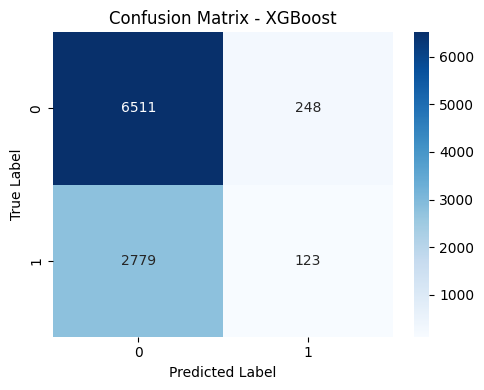

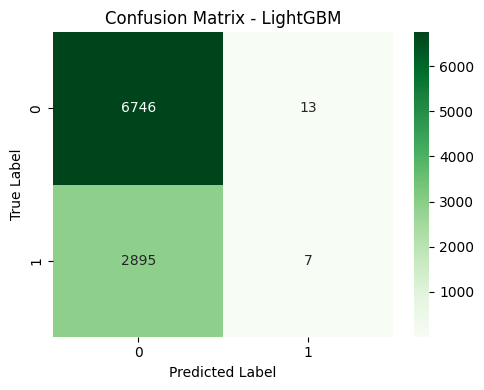

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Confusion matrix cho XGBoost ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# --- Confusion matrix cho LightGBM ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
